In [1]:
import pandas as pd
import collections
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import csv 
import numpy as np
from gensim.models import LdaModel


In [2]:
# load the dataset
# df = pd.read_csv('ds_test/preprocessed_topicmoddeling_masterset.csv', low_memory=False, lineterminator='\n')
df = pd.read_csv('ds_sentiment/reddit_climatechange_dataset_sentiment-v2.csv', low_memory=False, lineterminator='\n')

In [3]:
df_dtm = df

### Document Term Matrix

In [4]:
#removing nulls
mask = df_dtm['body-tm'].notnull()
df_dtm = df_dtm[mask]

In [5]:
# convert the preprocessed text column to a list of strings
documents = list(df_dtm['body-tm'])

# tokenize the documents
tokenized_docs = [doc.split() for doc in documents]

# create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# create a corpus using the dictionary and the tokenized documents
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [6]:
# Load the saved LDA model
lda_model = LdaModel.load("ds_test/topic_models/tm_seed4894454_topics30.model")

In [7]:
num_topics = 30
total_words = 10

## Save topic coherence

In [ ]:
# Define the topic number for which you want to calculate the coherence score
topic_number = 0

# Get the top words for the specific topic
topic_words = lda_model.show_topic(topic_number, topn=total_words)
topic_words = [word for word, _ in topic_words]


In [ ]:
# Compute coherence score for the specific topic
coherence_model = CoherenceModel(
    model=lda_model,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence_per_topic()[topic_number]

print(coherence_score)

In [ ]:
topic_cluster_words = []

topic_words = lda_model.show_topic(0, topn=10)
topic_words = [word for word, _ in topic_words]
topic_cluster_words.append(", ".join(topic_words))
print(topic_cluster_words)

In [ ]:
# # Save the DataFrame to a CSV file
# seednr = 4894454
# results_df.to_csv(f'ds_test/topicmodelling_results_seed{seednr}_topics{num_topics}_words{total_words}_coherence.csv', index=False)

## Label datset
Label topics to comments

In [15]:
# create an empty list to store the labels
labels = []
second_labels = []

# iterate over each comment in the dataset
for doc in corpus:
    # get the topic distribution for the current comment
    topic_dist = lda_model.get_document_topics(doc)
    
    # sort the topic distribution by probability
    sorted_topic_dist = sorted(topic_dist, key=lambda x: x[1], reverse=True)
    
    if len(sorted_topic_dist) < 2:
        # if there is only one topic, assign it as both top and second-best topic
        top_topic_idx = sorted_topic_dist[0][0]
    else:
        # find the index of the second-best topic
        second_best_topic_idx = sorted_topic_dist[1][0]
        # find the index of the top topic
        top_topic_idx = sorted_topic_dist[0][0]
    
    # assign the corresponding topic label to the comment
    label = top_topic_idx
    second_label = second_best_topic_idx
    labels.append(label)
    second_labels.append(second_label)
    
# add the lists of labels as new columns in the dataframe
df_dtm['top_weighted_topic'] = labels
df_dtm['second_weighted_topic'] = second_labels


In [16]:
df_dtm.head(20)

,created_utc,utc_datetime_str,subreddit,id,body,vader_sentiment_compound,sentiment_vader,body-tm,textblob_sentiment_subjectivity,textblob_sentiment_polarity,sentiment_textblob,top_weighted_topic,second_weighted_topic
0,1.359582e+09,2013-01-30 21:40:44,AskReddit,c86hmqz,The climate change denier analogy that I made ...,0.6948,positive,denier analogy made perfect get discussion ...,0.625000,0.275000,positive,9,13
1,1.359577e+09,2013-01-30 20:16:27,AskReddit,c86fpmd,It seems to be getting more attention than tho...,-0.7982,negative,seems getting attention issue lately feel lik...,0.528571,0.057143,positive,13,0
2,1.359575e+09,2013-01-30 19:40:47,AskReddit,c86ewz9,"Build a new one in Antarctica. Underground, or...",0.2263,positive,build new one antarctica underground wait ti...,0.527273,0.368182,positive,28,5
3,1.359566e+09,2013-01-30 17:13:27,AskReddit,c86bu1y,Fucking climate change. It disgusts me that so...,-0.0644,negative,fucking disgust many peoplegive fuck,0.633333,-0.166667,negative,11,6
4,1.359566e+09,2013-01-30 17:11:24,AskReddit,c86bsnj,"I stress about climate change, and worry about...",-0.6908,negative,stress worry future,0.125000,0.000000,neutral,10,21
5,1.359560e+09,2013-01-30 15:31:54,AskReddit,c869yg4,They can efficiently take down any civilian re...,-0.8996,negative,efficiently take civilian resistance whether b...,0.456119,-0.009382,negative,0,21
6,1.359533e+09,2013-01-30 08:02:38,AskReddit,c865vee,"There most definitely are ethical issues, just...",0.9855,positive,definitely ethical issue one people probably ...,0.655468,0.168147,positive,21,0
7,1.359526e+09,2013-01-30 06:10:59,AskReddit,c864ioc,Sure I can - I live happily thinking what I be...,0.7409,positive,sure live happily thinking believe true somet...,0.540278,0.173295,positive,22,8
8,1.359525e+09,2013-01-30 05:55:57,AskReddit,c864abh,"I do, yes. I don't believe anything I hear or ...",-0.7992,negative,yes believe anything hear see first glance m...,0.157576,0.063636,positive,22,8
9,1.359524e+09,2013-01-30 05:37:10,AskReddit,c863yy8,Climate change is much in effect. But change ...,-0.6486,negative,much effect must happen must lessen damage...,0.100000,0.100000,positive,15,21


In [17]:
# Save the DataFrame to a CSV file
df_dtm.to_csv(f'ds_master/reddit_climatechange_dataset_labelled.csv', index=False)

In [28]:
total_count = len(df_dtm)

# Compute coherence score for each topic
total_comments = []
topic_percentage = []

# Count the occurrences of each sentiment
topics_count = df_dtm['top_weighted_topic'].value_counts()

for i in range(30):
    topic_counter = topics_count.get(i, 0)
    total_comments.append(topic_counter)
    
    topic_per = round((topic_counter / total_count) * 100, 1)
    topic_percentage.append(topic_per)




# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'topic_number': range(30),
    'total_comments': total_comments,
    'percentage': topic_percentage
})

print(results_df.head(5))



   topic_number  total_comments  percentage
0             0          158934         8.3
1             1           48844         2.6
2             2           81363         4.3
3             3            3812         0.2
4             4            3128         0.2


In [29]:
results_df

,topic_number,total_comments,percentage
0,0,158934,8.3
1,1,48844,2.6
2,2,81363,4.3
3,3,3812,0.2
4,4,3128,0.2
5,5,95670,5.0
6,6,76115,4.0
7,7,34597,1.8
8,8,150988,7.9
9,9,67749,3.5


In [37]:
results_df.to_csv(f'ds_test/topic_models_distribution/topic_models_distribution.csv', index=False)

In [33]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'topic_number' and 'percentage'
# Sort the DataFrame by topic number
results_df = results_df.sort_values('topic_number')

# Extract the topic numbers and percentages
topic_numbers = results_df['topic_number']
percentages = results_df['percentage']



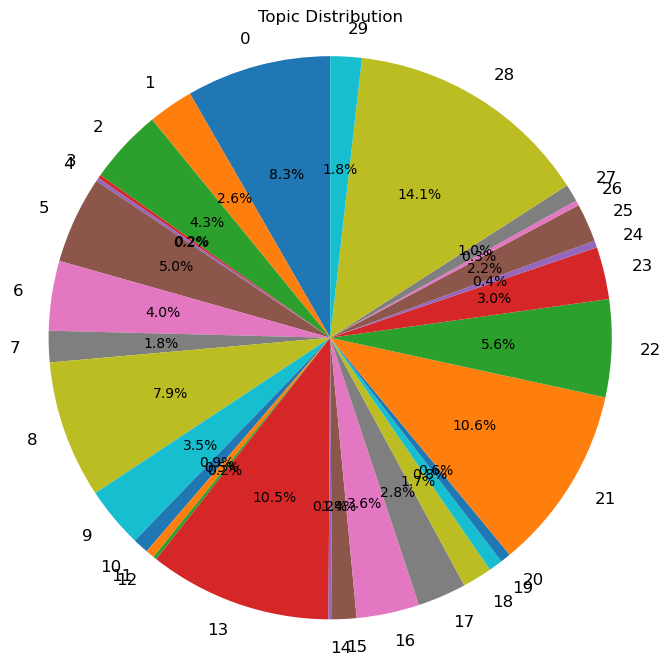

In [34]:


# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
patches, texts, _ = plt.pie(
    percentages,
    labels=topic_numbers,
    autopct='%1.1f%%',
    startangle=90,  # Rotate the chart to start from the top
    labeldistance=1.1,  # Increase the distance of labels from the center
)
plt.title('Topic Distribution')

# Make the labels more readable
for text in texts:
    text.set_fontsize(12)  # Adjust the font size as needed

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Show the chart
plt.show()


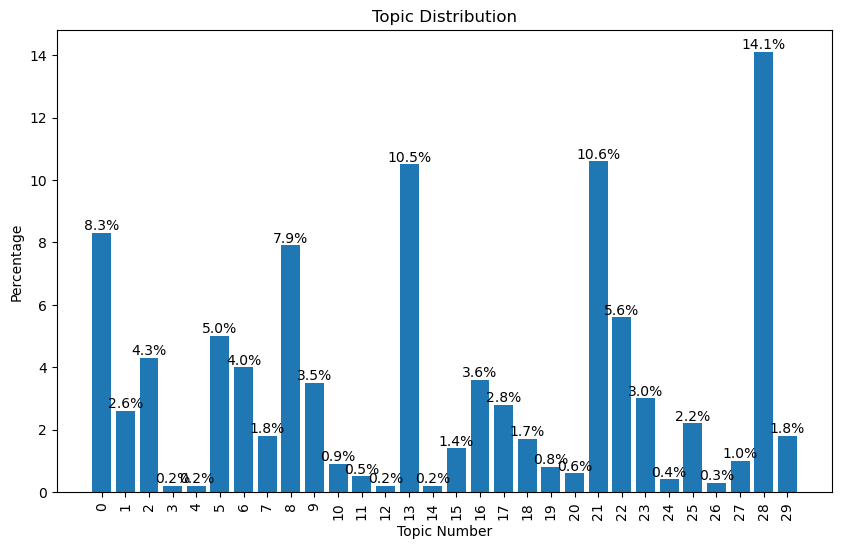

In [36]:


# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(topic_numbers, percentages)
plt.xlabel('Topic Number')
plt.ylabel('Percentage')
plt.title('Topic Distribution')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

    
    # Set custom labels for each bar on the x-axis
plt.xticks(range(len(topic_numbers)), topic_numbers)


# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the chart
plt.show()


## Independent coherence scores per topic

In [38]:
df_topic = pd.read_csv('ds_test/topic_models_distribution/topic_coherence-scores.csv', low_memory=False)

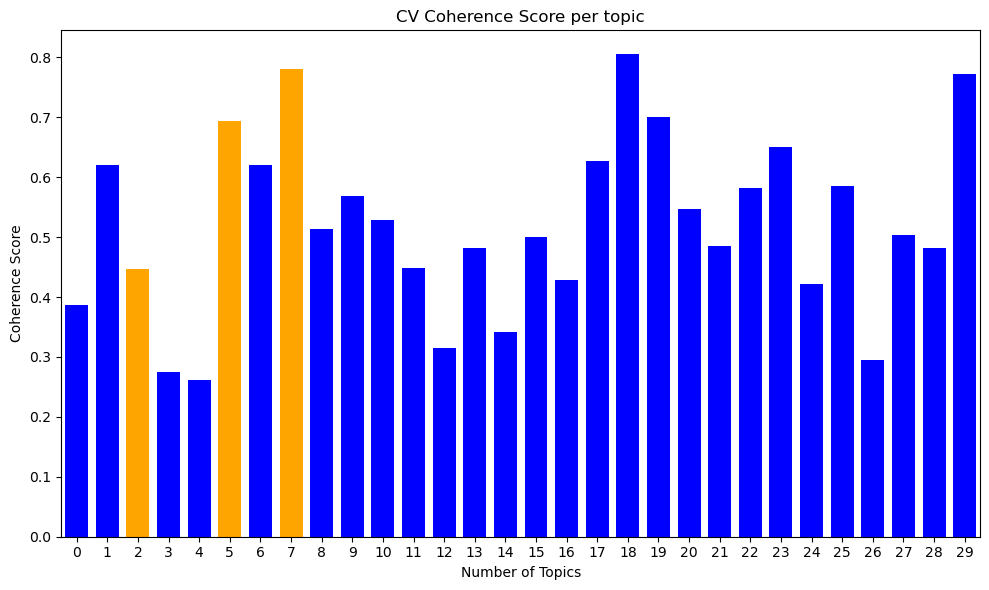

In [66]:
# Extract the number of topics and coherence scores
num_topics = df_topic['topic_number']
coherence_scores = df_topic['coherence_score']

# Plot the graph
colors = ['orange' if num_topics in [2, 5, 7] else 'blue' for num_topics in num_topics]
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(num_topics, coherence_scores, width=0.75, color=colors)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('CV Coherence Score per topic')
plt.xlim(min(num_topics)-0.5, max(num_topics)+0.5)  # Add a margin of 0.5 on both ends


    # Set custom labels for each bar on the x-axis
plt.xticks(range(len(topic_numbers)), topic_numbers)

# Adjust the layout to prevent the title from being cut off
plt.tight_layout()


# Save the graph as a PNG image
plt.savefig('tm_scores/tm_topic-coherence_graph.png')

# Show the graph
plt.show()
